In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("Backdoor_Attack_Results.csv")
df

,Attacker %,Static ASR,Static BA,Static Clean Acc,Location Inv ASR,Location Inv BA,Location Inv Clean Acc,Size Inv ASR,Size Inv BA,Size Inv Clean Acc,Pattern Inv ASR,Pattern Inv BA,Pattern Inv Clean Acc
0,0,9.60,54.80,53.95,9.60,54.80,53.95,9.60,54.80,53.95,9.60,54.80,53.95
1,10,67.75,26.25,54.30,11.00,55.10,56.15,56.85,34.10,55.05,64.95,29.70,56.40
2,20,87.35,16.50,54.20,15.20,53.00,53.40,77.85,21.65,52.90,84.40,17.65,53.55
3,30,92.55,13.50,52.50,15.00,53.05,53.55,91.50,14.40,54.45,91.10,14.45,52.60
4,40,94.45,13.05,52.35,23.95,50.25,51.40,95.30,12.60,52.55,94.50,12.85,53.20
5,50,96.65,11.55,51.70,37.80,45.15,46.35,96.50,11.85,52.45,96.90,11.55,54.25


In [ ]:
configurations = [
    {"label": "Size Invariant", "location": "fixed", "pattern_type": "plus"},
    {"label": "Location Invariant", "location": "random", "pattern_type": "plus"},
    {"label": "Size Invariant", "location": "fixed", "pattern_type": "plus", "pattern_size": "random"},
    {"label": "Pattern Invariant", "location": "fixed", "pattern_type": "random"}
]

In [5]:
results_asr = {config["label"]: [] for config in configurations}
results_bd_acc = {config["label"]: [] for config in configurations}
results_clean_acc = {config["label"]: [] for config in configurations}

In [6]:
for i in df["Static ASR"]:
    results_asr["Static case"].append(i)
for i in df["Static BA"]:
    results_bd_acc["Static case"].append(i)
for i in df["Static Clean Acc"]:
    results_clean_acc["Static case"].append(i)
    
for i in df["Location Inv ASR"]:
    results_asr["Location Invariant"].append(i)
for i in df["Location Inv BA"]:
    results_bd_acc["Location Invariant"].append(i)
for i in df["Location Inv Clean Acc"]:
    results_clean_acc["Location Invariant"].append(i)
    
for i in df["Size Inv ASR"]:
    results_asr["Size Invariant"].append(i)
for i in df["Size Inv BA"]:
    results_bd_acc["Size Invariant"].append(i)
for i in df["Size Inv Clean Acc"]:
    results_clean_acc["Size Invariant"].append(i)
    
for i in df["Pattern Inv ASR"]:
    results_asr["Pattern Invariant"].append(i)
for i in df["Pattern Inv BA"]:
    results_bd_acc["Pattern Invariant"].append(i)
for i in df["Pattern Inv Clean Acc"]:
    results_clean_acc["Pattern Invariant"].append(i)    

In [7]:
x_axis_attacker = [0, 10, 20, 30, 40, 50]

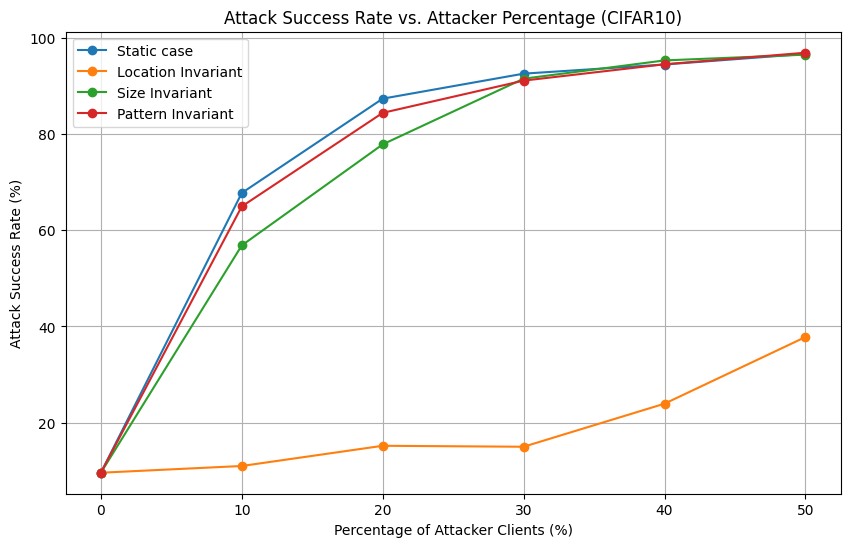

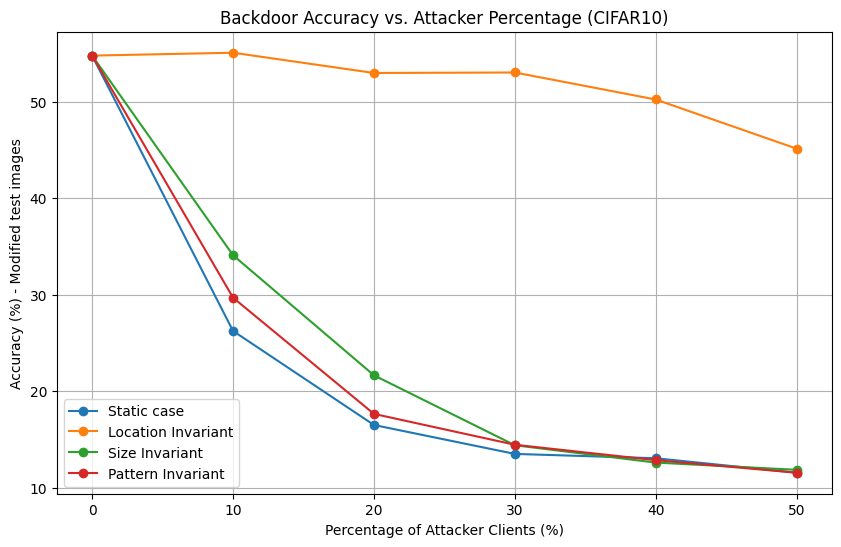

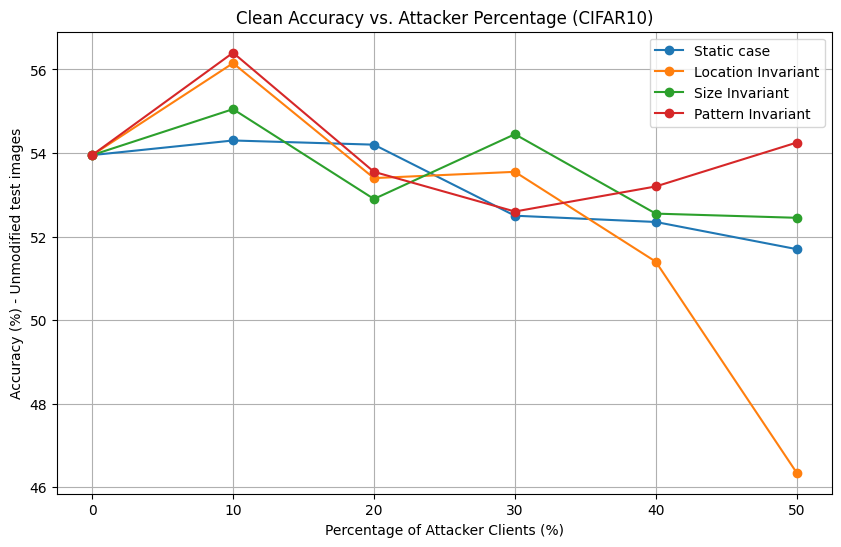

In [9]:
plt.figure(figsize=(10, 6))
for label, rates in results_asr.items():
    plt.plot(x_axis_attacker, rates, marker='o', label=label)
plt.xlabel("Percentage of Attacker Clients (%)")
plt.ylabel("Attack Success Rate (%)")
plt.title("Attack Success Rate vs. Attacker Percentage (CIFAR10)")
plt.legend()
plt.grid(True)
plt.savefig("backdoor_attack_success_vs_attacker_percentage.png")

# ----- Backdoor Accuracy vs. Attacker Percentage -----
plt.figure(figsize=(10, 6))
for label, bd_acc_rates in results_bd_acc.items():
    plt.plot(x_axis_attacker, bd_acc_rates, marker='o', label=label)
plt.xlabel("Percentage of Attacker Clients (%)")
plt.ylabel("Accuracy (%) - Modified test images")
plt.title("Backdoor Accuracy vs. Attacker Percentage (CIFAR10)")
plt.legend()
plt.grid(True)
plt.savefig("backdoor_accuracy_vs_attacker_percentage.png")

# ----- Clean Accuracy vs. Attacker Percentage -----
plt.figure(figsize=(10, 6))
for label, clean_acc_rates in results_clean_acc.items():
    plt.plot(x_axis_attacker, clean_acc_rates, marker='o', label=label)
plt.xlabel("Percentage of Attacker Clients (%)")
plt.ylabel("Accuracy (%) - Unmodified test images")
plt.title("Clean Accuracy vs. Attacker Percentage (CIFAR10)")
plt.legend()
plt.grid(True)
plt.savefig("clean_accuracy_vs_attacker_percentage.png")
